In [23]:
!pip install seaborn

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Cargar el dataset
file_path = "Mobiles Dataset.csv"
df = pd.read_csv(file_path, encoding='latin1')

In [26]:
# Limpiar y convertir columnas numéricas
df['Battery Capacity'] = pd.to_numeric(df['Battery Capacity'].str.replace(r'\D', '', regex=True), errors='coerce')
df['Mobile Weight'] = pd.to_numeric(df['Mobile Weight'].str.replace(r'\D', '', regex=True), errors='coerce')
df['Screen Size'] = pd.to_numeric(df['Screen Size'].str.extract(r'(\d+(\.\d+)?)')[0], errors='coerce')

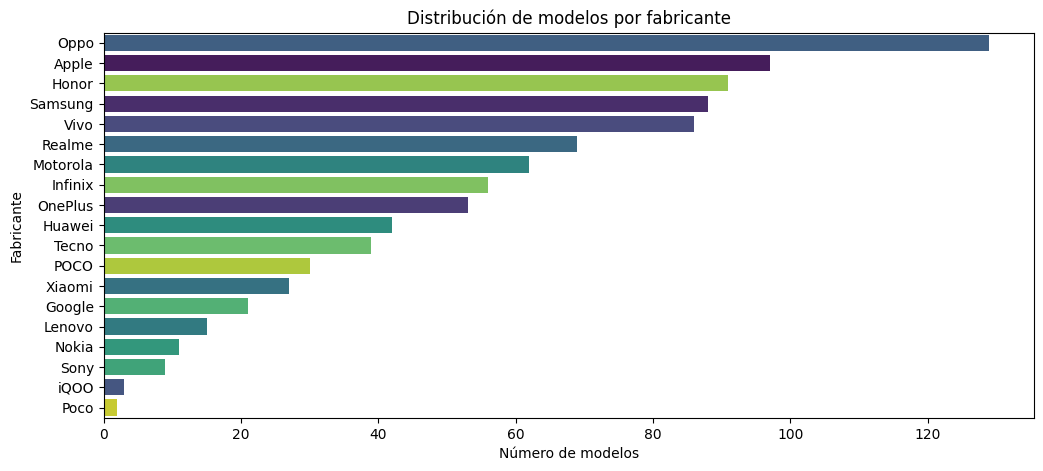

In [ ]:
plt.figure(figsize=(12, 5)) # Define el tamaño de la figura en 12x5 pulgadas para mejorar la visualización
sns.countplot(y='Company Name', data=df, order=df['Company Name'].value_counts().index, palette='viridis', hue='Company Name') # Crea un gráfico de barras mostrando la cantidad de modelos por fabricante
plt.title("Distribución de modelos por fabricante")
plt.xlabel("Número de modelos")
plt.ylabel("Fabricante")
plt.show()            

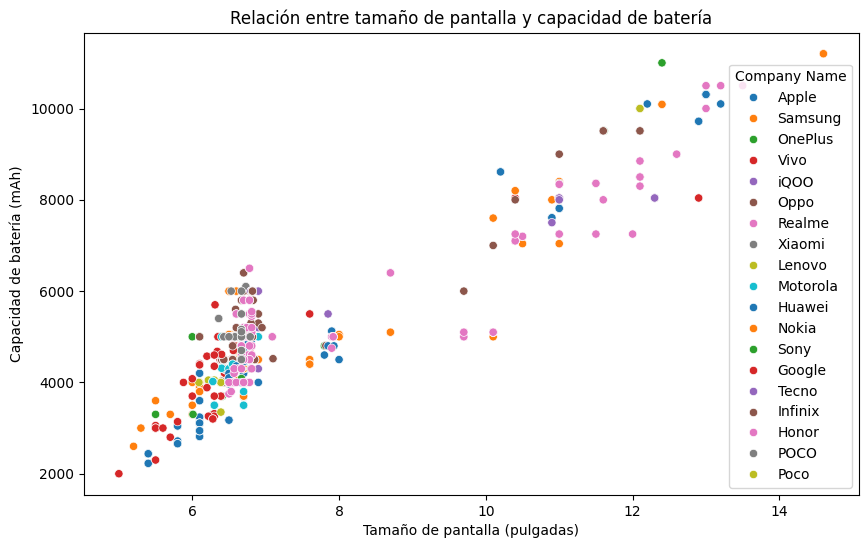

In [ ]:
plt.figure(figsize=(10, 6)) # Define el tamaño de la figura en 10x6 pulgadas para mejorar la visualización
sns.scatterplot(x=df['Screen Size'], y=df['Battery Capacity'], hue=df['Company Name'], palette='tab10')  # Crea un gráfico de dispersión con el tamaño de pantalla en el eje X y la capacidad de batería en el eje Y
plt.title("Relación entre tamaño de pantalla y capacidad de batería")
plt.xlabel("Tamaño de pantalla (pulgadas)")
plt.ylabel("Capacidad de batería (mAh)")
plt.show()

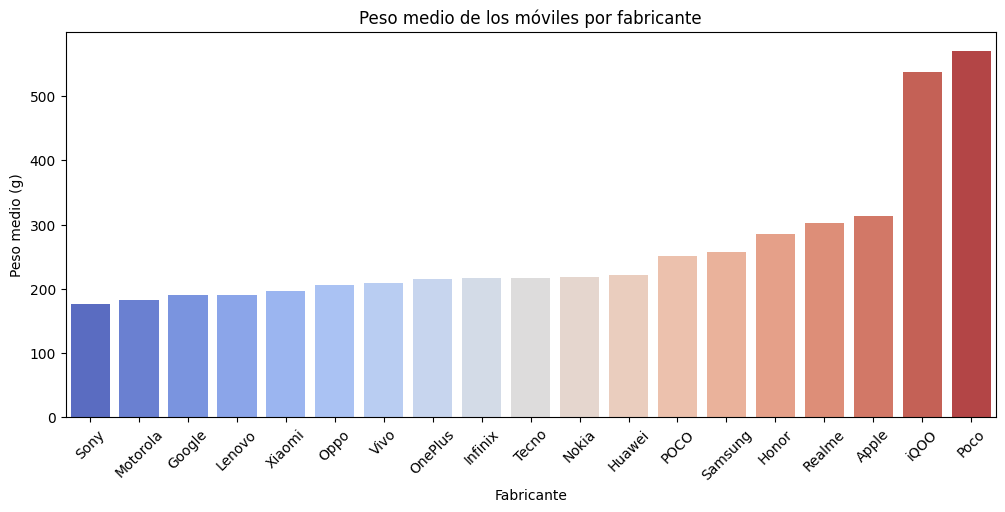

In [ ]:
df_weight = df.groupby('Company Name')['Mobile Weight'].mean().sort_values()  # Calcula el peso medio por fabricante y lo ordena de menor a mayor

plt.figure(figsize=(12, 5))
sns.barplot(x=df_weight.index, y=df_weight.values, palette='coolwarm', hue=df_weight.index)  # Crea un gráfico de barras con los fabricantes en el eje X y el peso medio en el eje Y
plt.xticks(rotation=45) # Para que se vea mejor los nombres de los fabricantes
plt.title("Peso medio de los móviles por fabricante")
plt.xlabel("Fabricante")
plt.ylabel("Peso medio (g)")
plt.show()


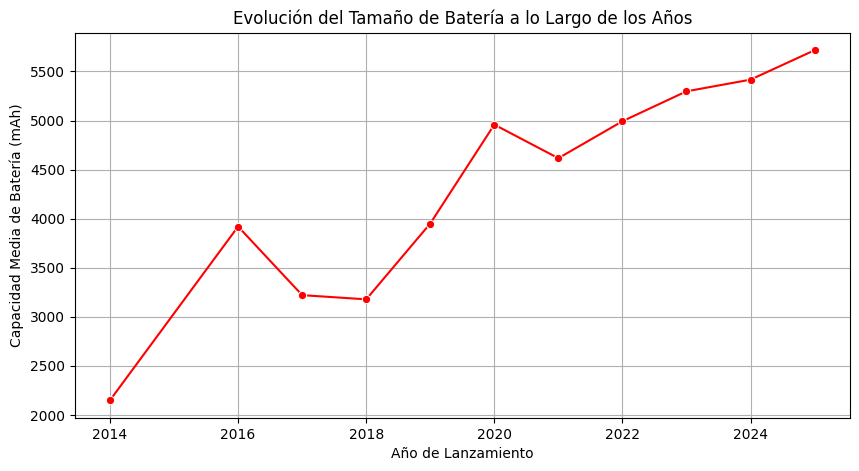

In [ ]:
df_year_battery = df.groupby('Launched Year')['Battery Capacity'].mean() # Calcula la capacidad media de la batería por año de lanzamiento

plt.figure(figsize=(10, 5))
sns.lineplot(x=df_year_battery.index, y=df_year_battery.values, marker="o", color='red') # Crea un gráfico de líneas con el año en el eje X y la capacidad media de la batería en el eje Y
plt.title("Evolución del Tamaño de Batería a lo Largo de los Años")
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Capacidad Media de Batería (mAh)")
plt.grid(True) # Activa la cuadrícula para facilitar la lectura de los datos
plt.show()

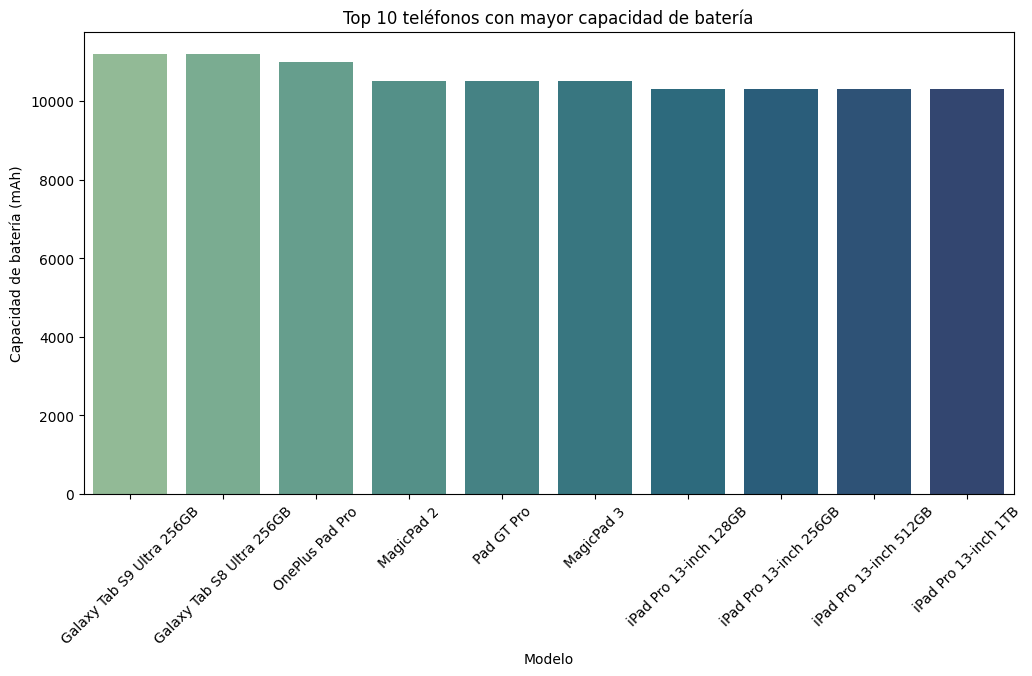

In [ ]:
df_top_battery = df.nlargest(10, 'Battery Capacity') # Selecciona los 10 teléfonos con mayor capacidad de batería

plt.figure(figsize=(12, 6))
sns.barplot(x='Model Name', y='Battery Capacity', data=df_top_battery, palette='crest', hue='Model Name') # Crea un gráfico de barras con los modelos en el eje X y la capacidad de batería en el eje Y
plt.xticks(rotation=45)
plt.title("Top 10 teléfonos con mayor capacidad de batería")
plt.xlabel("Modelo")
plt.ylabel("Capacidad de batería (mAh)")
plt.show()

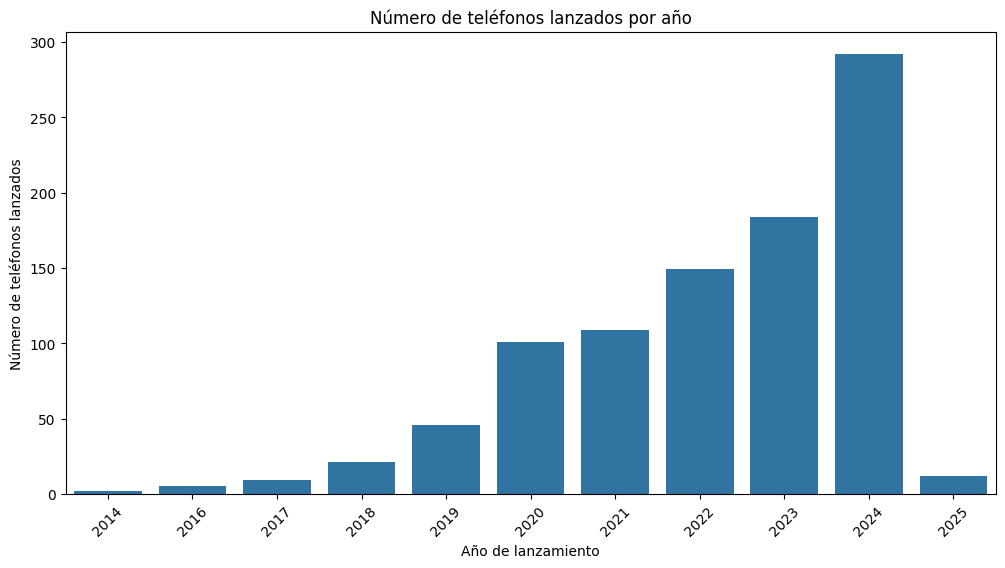

In [ ]:
df_year_count = df.groupby('Launched Year').size() # Agrupa los datos por año de lanzamiento y cuenta la cantidad de teléfonos lanzados cada año

plt.figure(figsize=(12, 6))
sns.barplot(x=df_year_count.index, y=df_year_count.values) # Crea un gráfico de barras con los años en el eje X y el número de teléfonos en el eje Y
plt.title("Número de teléfonos lanzados por año")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Número de teléfonos lanzados")
plt.xticks(rotation=45)
plt.show()

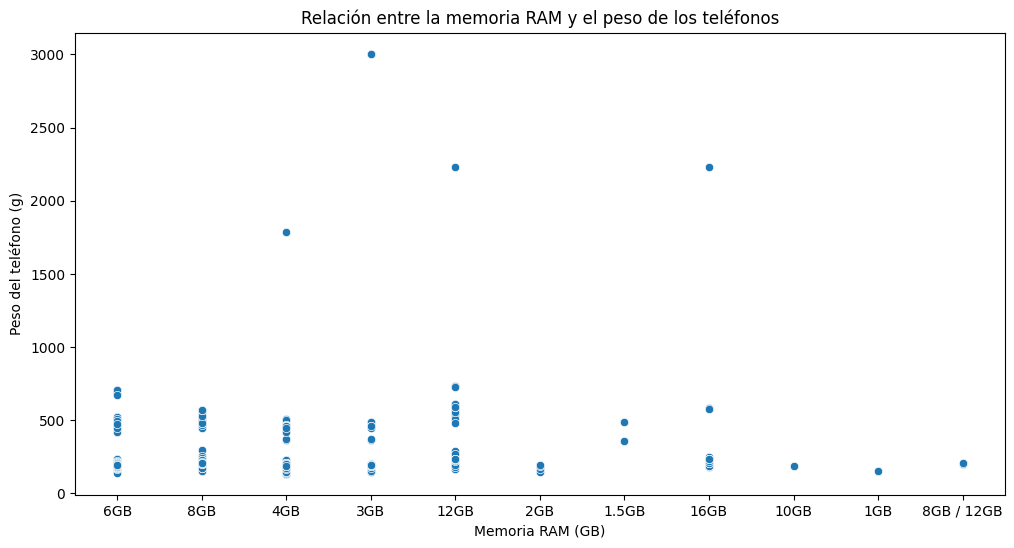

In [ ]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x='RAM', y='Mobile Weight', data=df) # Crea un gráfico de dispersión con RAM en el eje X y el peso del teléfono en el eje Y
plt.title("Relación entre la memoria RAM y el peso de los teléfonos")
plt.xlabel("Memoria RAM (GB)")
plt.ylabel("Peso del teléfono (g)")
plt.show()